In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_csv("House Price Dataset.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.drop(columns=['date', 'street', 'city', 'statezip', 'country'], inplace=True)

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


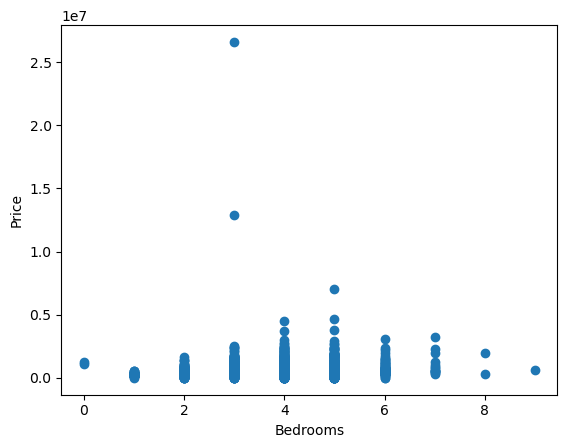

In [6]:
plt.scatter(df.bedrooms, df.price)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

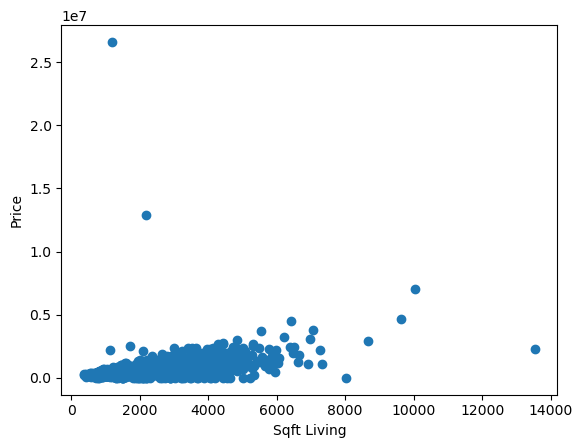

In [7]:
plt.scatter(df.sqft_living, df.price)
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()

In [8]:
x = df.drop(columns=['price'])
y = df.price

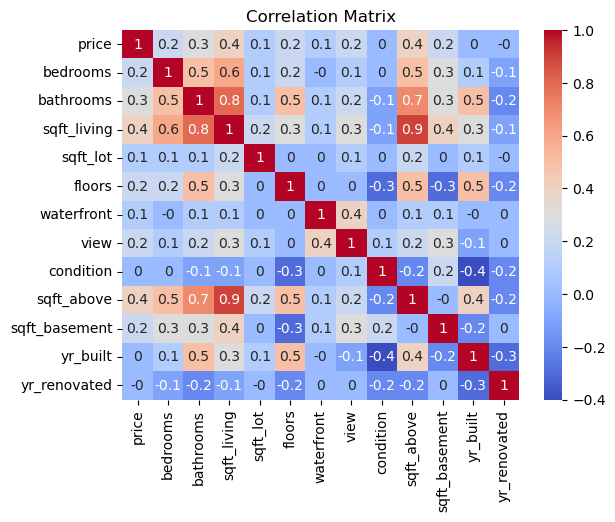

In [9]:
correlation_matrix = df.corr()
sns.heatmap(round(correlation_matrix, 1), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
pd.DataFrame({'Actual Results': Y_test, 'Predicted Results': y_pred})

,Actual Results,Predicted Results
2899,600000.0,799106.369180
61,459990.0,649869.857726
1627,399000.0,403396.157562
202,562000.0,668469.125202
2374,405000.0,209780.391515
...,...,...
3635,461000.0,953236.254854
3880,1054690.0,793786.566781
3930,395000.0,674837.497303
2619,685000.0,739630.480104


In [14]:
r2 = r2_score(Y_test, y_pred)
mean_error = mean_squared_error(Y_test, y_pred)

In [15]:
print(f'R Square: {r2}')
print(f'Mean Squared Error: {mean_error}')

R Square: 0.5332081009494096
Mean Squared Error: 76941959073.31456


In [16]:
coefficients = model.coef_
intercept = model.intercept_

In [17]:
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-5.20192058e+04  6.36995878e+04  1.52054560e+02 -6.82327189e-01
  3.94624921e+04  8.00939603e+04  5.54488214e+04  4.05325279e+04
  9.48821641e+01  5.71723963e+01 -2.20532865e+03  6.51806032e+00]
Intercept: 4214937.272539681
